I imported Pandas

In [407]:
import pandas as pd

I loaded the data

In [408]:
df= pd.read_csv('my_data_selection.csv', header=0, sep=',', quotechar='"')

I got a better idea of how the data looked and what I was working with.

In [409]:
df.columns

Index(['Country or Area', 'Commodity - Transaction', 'Year', 'Unit',
       'Quantity', 'Quantity Footnotes'],
      dtype='object')

In [410]:
df.info

<bound method DataFrame.info of        Country or Area         Commodity - Transaction    Year  \
0          Afghanistan  Electricity - Gross production  2021.0   
1          Afghanistan  Electricity - Gross production  2020.0   
2          Afghanistan  Electricity - Gross production  2019.0   
3          Afghanistan  Electricity - Gross production  2018.0   
4          Afghanistan  Electricity - Gross production  2017.0   
...                ...                             ...     ...   
99997    Liechtenstein  Electricity - Gross production  2016.0   
99998    Liechtenstein  Electricity - Gross production  2015.0   
99999    Liechtenstein  Electricity - Gross production  2014.0   
100000         fnSeqID                        Footnote     NaN   
100001               1                        Estimate     NaN   

                           Unit  Quantity  Quantity Footnotes  
0       Kilowatt-hours, million   1392.00                 1.0  
1       Kilowatt-hours, million   1336.88      

In [411]:
df.shape

(100002, 6)

In [412]:
df.describe

<bound method NDFrame.describe of        Country or Area         Commodity - Transaction    Year  \
0          Afghanistan  Electricity - Gross production  2021.0   
1          Afghanistan  Electricity - Gross production  2020.0   
2          Afghanistan  Electricity - Gross production  2019.0   
3          Afghanistan  Electricity - Gross production  2018.0   
4          Afghanistan  Electricity - Gross production  2017.0   
...                ...                             ...     ...   
99997    Liechtenstein  Electricity - Gross production  2016.0   
99998    Liechtenstein  Electricity - Gross production  2015.0   
99999    Liechtenstein  Electricity - Gross production  2014.0   
100000         fnSeqID                        Footnote     NaN   
100001               1                        Estimate     NaN   

                           Unit  Quantity  Quantity Footnotes  
0       Kilowatt-hours, million   1392.00                 1.0  
1       Kilowatt-hours, million   1336.88    

I am read the accompanying questionaire guidelines to understand the data.

Findings: So the data measures by country different types of energy products and the flow of that energy product seperated by country or geographic area. After reading about the statistics, I thought it would be interesting to look at some trends from these reports over the years. Specifically, I want to know about electricity consumption in Africa pre and post COVID. The data set from Kaggle was from 2015 so I went on UN Data.org and dowloaded a custom dataset.

For the purposes of practicing, I downloaded 5 years of data and all of the countries. I import the csv data I dowloaded from the dashboard.

In order to isolate the African Countries, I needed to see what the list and their values looked like in the Country column.

In [413]:
pd.unique(df['Country or Area'])

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plur. State of)', 'Bonaire, St Eustatius, Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Rep.', 'Chad',
       'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Czechoslovakia (former)', 'Dem. Rep. of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',

I write a list of African countries.

In [414]:
africa= ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Rep.', 'Chad', 'Comoros', 'Dem. Rep. of the Congo', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

I make a new dataframe including only African Nations.

In [415]:
africa_data=df[df['Country or Area'].isin(africa)]

In [416]:
africa_data

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
1476,Algeria,Electricity - Gross production,2020.0,"Kilowatt-hours, million",79155.044,NaN
1477,Algeria,Electricity - Gross production,2019.0,"Kilowatt-hours, million",81532.740,NaN
1478,Algeria,Electricity - Gross production,2018.0,"Kilowatt-hours, million",76662.180,NaN
1479,Algeria,Electricity - Gross production,2017.0,"Kilowatt-hours, million",76018.111,NaN
1480,Algeria,Electricity - Gross production,2016.0,"Kilowatt-hours, million",71091.500,NaN
...,...,...,...,...,...,...
99987,Libya,Electricity - Gross demand,1994.0,"Kilowatt-hours, million",10353.000,NaN
99988,Libya,Electricity - Gross demand,1993.0,"Kilowatt-hours, million",10045.000,NaN
99989,Libya,Electricity - Gross demand,1992.0,"Kilowatt-hours, million",9530.000,NaN
99990,Libya,Electricity - Gross demand,1991.0,"Kilowatt-hours, million",9265.000,NaN


I only keep data from 2019-2021.

In [417]:
africa_data= africa_data[africa_data['Year']>= 2019.00]

In [418]:
africa_data

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
1476,Algeria,Electricity - Gross production,2020.0,"Kilowatt-hours, million",79155.044,NaN
1477,Algeria,Electricity - Gross production,2019.0,"Kilowatt-hours, million",81532.740,NaN
1507,Algeria,From combustible fuels – Main activity,2020.0,"Kilowatt-hours, million",73115.165,NaN
1508,Algeria,From combustible fuels – Main activity,2019.0,"Kilowatt-hours, million",75183.000,NaN
1538,Algeria,From combustible fuels – Main activity – Elect...,2020.0,"Kilowatt-hours, million",73115.165,NaN
...,...,...,...,...,...,...
99916,Libya,Electricity - Consumption by commercial and pu...,2019.0,"Kilowatt-hours, million",1969.480,NaN
99930,Libya,"Electricity - total production, main activity",2020.0,"Kilowatt-hours, million",29499.011,NaN
99931,Libya,"Electricity - total production, main activity",2019.0,"Kilowatt-hours, million",34628.531,NaN
99961,Libya,Electricity - Gross demand,2020.0,"Kilowatt-hours, million",29922.716,NaN


Cleaning and Preprocessing

Null Values

I am going to drop the quantity footnotes column. There's a lot of nulls and there's not much analysis I want to do with the footnotes.

In [419]:
africa_data.drop('Quantity Footnotes', axis=1, inplace=True)

C:\Users\calve\AppData\Local\Temp\ipykernel_13644\2780623739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_data.drop('Quantity Footnotes', axis=1, inplace=True)


In [420]:
africa_data.columns

Index(['Country or Area', 'Commodity - Transaction', 'Year', 'Unit',
       'Quantity'],
      dtype='object')

Next I will check for more rows with null values. Since the UN Data is relatively clean, I do not have to find and replace other forms of null values.

In [421]:
africa_data.isnull().any()

Country or Area            False
Commodity - Transaction    False
Year                       False
Unit                       False
Quantity                   False
dtype: bool

Outliers

Next I am going to get basic stats so I can see outliers. First, I want to find the unique values in Commodity Transactions. Then I will group by year and types and get the basic stats on each in order to look for outliers or have then in mind when I make my visuals.

In [422]:
africa_data.groupby(['Commodity - Transaction', 'Year'])['Quantity'].describe()

count         mean  \
Commodity - Transaction                            Year                         
Electricity - Consumption by chemical and petro... 2019.0    6.0   315.962667   
                                                   2020.0    6.0   293.882667   
                                                   2021.0    1.0   156.788000   
Electricity - Consumption by commercial and pub... 2019.0   21.0  2688.908762   
                                                   2020.0   22.0  2669.617000   
...                                                          ...          ...   
Solar – Main activity                              2020.0   20.0   272.888000   
                                                   2021.0    9.0    23.092778   
Wind – Main activity                               2019.0    7.0   874.593857   
                                                   2020.0    7.0   884.481857   
                                                   2021.0    2.0     4.550000   

                                                                   std  \
Commodity - Transaction                            Year                  
Electricity - Consumption by chemical and petro... 2019.0   675.511821   
                                                   2020.0   615.293053   
                                                   2021.0          NaN   
Electricity - Consumption by commercial and pub... 2019.0  8595.769976   
                                                   2020.0  8072.628781   
...                                                                ...   
Solar – Main activity                              2020.0   989.346664   
                                                   2021.0    41.576668   
Wind – Main activity                               2019.0  1379.203894   
                                                   2020.0  1559.100989   
                                                   2021.0     6.293250   

                                                               min       25%  \
Commodity - Transaction                            Year                        
Electricity - Consumption by chemical and petro... 2019.0    1.278    7.4055   
                                                   2020.0    1.284    7.4290   
                                                   2021.0  156.788  156.7880   
Electricity - Consumption by commercial and pub... 2019.0   12.000  216.3600   
                                                   2020.0    8.200  222.0950   
...                                                            ...       ...   
Solar – Main activity                              2020.0    0.430    5.5655   
                                                   2021.0    0.022    0.6000   
Wind – Main activity                               2019.0    0.100    5.5000   
                                                   2020.0    0.100    4.8505   
                                                   2021.0    0.100    2.3250   

                                                                50%  \
Commodity - Transaction                            Year               
Electricity - Consumption by chemical and petro... 2019.0   42.3385   
                                                   2020.0   41.5575   
                                                   2021.0  156.7880   
Electricity - Consumption by commercial and pub... 2019.0  506.4720   
                                                   2020.0  562.8025   
...                                                             ...   
Solar – Main activity                              2020.0   11.8690   
                                                   2021.0    3.5720   
Wind – Main activity                               2019.0   11.6900   
                                                   2020.0    9.0000   
                                                   2021.0    4.5500   

                                                                  75%  \
Comm

As expected, there's not much to be seen from the stats above.

Structure

I will now see if there is more than one type of unit.

In [423]:
pd.unique(africa_data['Unit'])

array(['Kilowatt-hours, million'], dtype=object)

Since there is not I will note that it is Kilowatt-hours, million and drop that column.

In [424]:
africa_data.drop('Unit', axis=1, inplace=True)

C:\Users\calve\AppData\Local\Temp\ipykernel_13644\2850413400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_data.drop('Unit', axis=1, inplace=True)


In [425]:
africa_data.columns

Index(['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity'], dtype='object')

Next I want to see the different values in the Commodity - Transactions column. I might manipulate it further on for different types of analysis and visuals.

In [426]:
pd.unique(africa_data['Commodity - Transaction'])

array(['Electricity - Gross production',
       'From combustible fuels – Main activity',
       'From combustible fuels – Main activity – Electricity plants',
       'Hydro – Main activity', 'Solar – Main activity',
       'Solar photovoltaic – Main activity', 'Wind – Main activity',
       'From combustible fuels – Autoproducer',
       'From combustible fuels – Autoproducer – Electricity plants',
       'Electricity - net production', 'Electricity - imports',
       'Electricity - exports', 'Electricity - Energy industries own use',
       'Electricity - Own use by oil and gas extraction',
       'Electricity - Own use by oil refineries',
       'Electricity - Own use by electricity, heat and CHP plants',
       'Electricity - Own use by LNG/regasification plants',
       'Electricity - Losses', 'Electricity - Final energy consumption',
       'Electricity - Consumption by manufacturing, construction and non-fuel industry',
       'Electricity - Consumption by iron and steel',
     

Duplicates

I don't think there are any, but this would clean up any duplicate rows in the data.

In [427]:
africa_data= africa_data.drop_duplicates()

Data Types

I want to make the year column int64.

In [428]:
africa_data['Year'] = pd.to_datetime(africa_data['Year'], format='%Y')

In [429]:
africa_data['Year'] = africa_data['Year'].dt.year

In [430]:
type(africa_data['Year'][1476])

numpy.int64

I import seaborn as sns and folium in order to start visualizing the data.

In [431]:
import seaborn as sns

In [432]:
import folium

Visualizations

I made a heatmap for Gross Electricity Production and Demand in 2019, 2020, 2021. So first, I found all the countries represented by the data. Then I asked ChatGpt to write me a pd series with corresponding lat longs of the center of the countries. I am going to append the lat and longs to the data as a new column. Then I asked ChatGpt for an appropriate lat long for the center of Africa. Finally, I can play with my data and make layers.

In [433]:
pd.unique(africa_data['Country or Area'])

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Rep.', 'Chad', 'Comoros',
       'Congo', "Côte d'Ivoire", 'Dem. Rep. of the Congo', 'Djibouti',
       'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Libya'], dtype=object)

In [434]:
country_lats = pd.Series(data= {
    'Algeria': 28.0339,
    'Angola': -11.2027,
    'Benin': 9.3077,
    'Botswana': -22.3285,
    'Burkina Faso': 12.2383,
    'Burundi': -3.3731,
    'Cameroon': 7.3697,
    'Central African Rep.': 6.6111,
    'Chad': 15.4542,
    'Comoros': -11.6455,
    'Congo': -0.2280,
    "Côte d'Ivoire": 7.5400,
    'Dem. Rep. of the Congo': -4.0383,
    'Djibouti': 11.8251,
    'Egypt': 26.8206,
    'Equatorial Guinea': 1.6508,
    'Eritrea': 15.1794,
    'Ethiopia': 9.1450,
    'Gabon': -0.8037,
    'Gambia': 13.4432,
    'Ghana': 7.9465,
    'Guinea': 9.9456,
    'Guinea-Bissau': 11.8037,
    'Kenya': -0.0236,
    'Lesotho': -29.6100,
    'Liberia': 6.4281,
    'Libya': 26.3351}, name= 'country_lats')

In [435]:
country_longs = pd.Series(data= {
    'Algeria': 1.6596,
    'Angola': 17.8739,
    'Benin': 2.3158,
    'Botswana': 24.6849,
    'Burkina Faso': -1.5616,
    'Burundi': 29.9189,
    'Cameroon': 12.3547,
    'Central African Rep.': 20.9394,
    'Chad': 18.7322,
    'Comoros': 43.3333,
    'Congo': 15.8277,
    "Côte d'Ivoire": -5.5471,
    'Dem. Rep. of the Congo': 21.7587,
    'Djibouti': 42.5903,
    'Egypt': 30.8025,
    'Equatorial Guinea': 10.2679,
    'Eritrea': 39.7823,
    'Ethiopia': 40.4897,
    'Gabon': 11.6094,
    'Gambia': -15.3101,
    'Ghana': -1.0232,
    'Guinea': -9.6966,
    'Guinea-Bissau': -15.1804,
    'Kenya': 37.9062,
    'Lesotho': 28.2336,
    'Liberia': -9.4295,
    'Libya': 17.2283}, name= 'country_longs')

In [436]:
africa_data = pd.merge(africa_data, country_longs, how='outer', left_on='Country or Area', right_index=True)
africa_data = pd.merge(africa_data, country_lats, how='outer', left_on='Country or Area', right_index=True)

In [437]:
africa_data

,Country or Area,Commodity - Transaction,Year,Quantity,country_longs,country_lats
1476,Algeria,Electricity - Gross production,2020,79155.044,1.6596,28.0339
1477,Algeria,Electricity - Gross production,2019,81532.740,1.6596,28.0339
1507,Algeria,From combustible fuels – Main activity,2020,73115.165,1.6596,28.0339
1508,Algeria,From combustible fuels – Main activity,2019,75183.000,1.6596,28.0339
1538,Algeria,From combustible fuels – Main activity – Elect...,2020,73115.165,1.6596,28.0339
...,...,...,...,...,...,...
99916,Libya,Electricity - Consumption by commercial and pu...,2019,1969.480,17.2283,26.3351
99930,Libya,"Electricity - total production, main activity",2020,29499.011,17.2283,26.3351
99931,Libya,"Electricity - total production, main activity",2019,34628.531,17.2283,26.3351
99961,Libya,Electricity - Gross demand,2020,29922.716,17.2283,26.3351


Heat Map of Trends of Gross Production vs Demand Pre, During, and Post Covid

I then import the HeatMap.

In [439]:
from folium.plugins import HeatMap

In [440]:
africa_data.columns

Index(['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'],
      dtype='object')

In [441]:
#Making the dataset for the first HeatMap.
#1. I made an empty dataframe.
heat_map_data2019 = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])

#2. I appended the empty dataframe with all rows that were Gross Electricity Production in 2019
for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross production' and row['Year']== 2019:
        heat_map_data2019 = heat_map_data2019.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)


C:\Users\calve\AppData\Local\Temp\ipykernel_13644\4012863569.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  heat_map_data2019 = heat_map_data2019.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users\calve\AppData\Local\Temp\ipykernel_13644\4012863569.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  heat_map_data2019 = heat_map_data2019.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users\cal

In [442]:
heat_map_data2019

,Country or Area,Commodity - Transaction,Year,Quantity,country_longs,country_lats
0,Algeria,Electricity - Gross production,2019,81532.740,1.6596,28.0339
1,Angola,Electricity - Gross production,2019,15473.829,17.8739,-11.2027
2,Benin,Electricity - Gross production,2019,528.617,2.3158,9.3077
3,Botswana,Electricity - Gross production,2019,2508.096,24.6849,-22.3285
4,Burkina Faso,Electricity - Gross production,2019,752.257,-1.5616,12.2383
5,Burundi,Electricity - Gross production,2019,269.194,29.9189,-3.3731
6,Cameroon,Electricity - Gross production,2019,8476.104,12.3547,7.3697
7,Central African Rep.,Electricity - Gross production,2019,149.430,20.9394,6.6111
8,Chad,Electricity - Gross production,2019,317.000,18.7322,15.4542
9,Comoros,Electricity - Gross production,2019,108.400,43.3333,-11.6455


In [443]:
heat_map_data2019['Quantity'].min()

82.458

In [444]:
#I initialized the Heatmap at the center of Africa.
heat_map1 = folium.Map(location= [7.1881, 21.0938], zoom_start = 3)

#I wrote a dictionary of gradients so that the higher the production the closer/redder it gets.
gradient = {0.4: 'blue', 0.65: 'lime', 1: 'red'}
#I stored the min and max Quantity.
min_val = heat_map_data2019['Quantity'].min()
max_val = heat_map_data2019['Quantity'].max()

#I constructed the heatmap.
heat_map.add_child(folium.plugins.HeatMap(data=heat_map_data2019[['country_lats', 'country_longs', 'Quantity']].values, gradient=gradient, min_opacity=0.2, max_val=max_val, min_val=min_val))

C:\Users\calve\AppData\Local\Temp\ipykernel_13644\3133838755.py:7: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heat_map.add_child(folium.plugins.HeatMap(data=heat_map_data2019[['country_lats', 'country_longs', 'Quantity']].values, gradient=gradient, min_opacity=0.2, max_val=max_val, min_val=min_val))


I then repeated this method to make a map of Gross Production in 2019, 2020, and 2021. Then used the methods again for Gross Demand of Electricity.

In [445]:
heat_map_data2020 = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])

for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross production' and row['Year']== 2020:
        heat_map_data2020 = heat_map_data2020.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)


C:\Users\calve\AppData\Local\Temp\ipykernel_13644\3412307104.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  heat_map_data2020 = heat_map_data2020.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users\calve\AppData\Local\Temp\ipykernel_13644\3412307104.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  heat_map_data2020 = heat_map_data2020.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users\cal

In [446]:
heat_map2 = folium.Map(location= [7.1881, 21.0938], zoom_start = 3)

gradient = {0.4: 'blue', 0.65: 'lime', 1: 'red'}
min_val = heat_map_data2020['Quantity'].min()
max_val = heat_map_data2020['Quantity'].max()

heat_map.add_child(folium.plugins.HeatMap(data=heat_map_data2020[['country_lats', 'country_longs', 'Quantity']].values, gradient=gradient, min_opacity=0.2, max_val=max_val, min_val=min_val))

C:\Users\calve\AppData\Local\Temp\ipykernel_13644\1579640700.py:7: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heat_map.add_child(folium.plugins.HeatMap(data=heat_map_data2020[['country_lats', 'country_longs', 'Quantity']].values, gradient=gradient, min_opacity=0.2, max_val=max_val, min_val=min_val))


In [447]:
heat_map_data2021 = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])

for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross production' and row['Year']== 2021:
        heat_map_data2021 = heat_map_data2021.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)

C:\Users\calve\AppData\Local\Temp\ipykernel_13644\956599853.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  heat_map_data2021 = heat_map_data2021.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users\calve\AppData\Local\Temp\ipykernel_13644\956599853.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  heat_map_data2021 = heat_map_data2021.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users\calve

In [448]:
heat_map3 = folium.Map(location= [7.1881, 21.0938], zoom_start = 3)

gradient = {0.4: 'blue', 0.65: 'lime', 1: 'red'}
min_val = heat_map_data2021['Quantity'].min()
max_val = heat_map_data2021['Quantity'].max()

heat_map.add_child(folium.plugins.HeatMap(data=heat_map_data2021[['country_lats', 'country_longs', 'Quantity']].values, gradient=gradient, min_opacity=0.2, max_val=max_val, min_val=min_val))

C:\Users\calve\AppData\Local\Temp\ipykernel_13644\188310214.py:7: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heat_map.add_child(folium.plugins.HeatMap(data=heat_map_data2021[['country_lats', 'country_longs', 'Quantity']].values, gradient=gradient, min_opacity=0.2, max_val=max_val, min_val=min_val))


In [449]:
heat_map_data2019b = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])

for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross demand' and row['Year']== 2019:
        heat_map_data2019b = heat_map_data2019b.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)

C:\Users\calve\AppData\Local\Temp\ipykernel_13644\2024237574.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  heat_map_data2019b = heat_map_data2019b.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users\calve\AppData\Local\Temp\ipykernel_13644\2024237574.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  heat_map_data2019b = heat_map_data2019b.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users

In [450]:
heat_map4 = folium.Map(location= [7.1881, 21.0938], zoom_start = 3)

gradient = {0.4: 'blue', 0.65: 'lime', 1: 'red'}
min_val = heat_map_data2019b['Quantity'].min()
max_val = heat_map_data2019b['Quantity'].max()

heat_map.add_child(folium.plugins.HeatMap(data=heat_map_data2019b[['country_lats', 'country_longs', 'Quantity']].values, gradient=gradient, min_opacity=0.2, max_val=max_val, min_val=min_val))

C:\Users\calve\AppData\Local\Temp\ipykernel_13644\1182524326.py:7: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heat_map.add_child(folium.plugins.HeatMap(data=heat_map_data2019b[['country_lats', 'country_longs', 'Quantity']].values, gradient=gradient, min_opacity=0.2, max_val=max_val, min_val=min_val))


In [451]:
heat_map_data2020b = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])

for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross demand' and row['Year']== 2020:
        heat_map_data2020b = heat_map_data2020b.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)

C:\Users\calve\AppData\Local\Temp\ipykernel_13644\657010622.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  heat_map_data2020b = heat_map_data2020b.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users\calve\AppData\Local\Temp\ipykernel_13644\657010622.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  heat_map_data2020b = heat_map_data2020b.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users\c

In [452]:
heat_map5 = folium.Map(location= [7.1881, 21.0938], zoom_start = 3)

gradient = {0.4: 'blue', 0.65: 'lime', 1: 'red'}
min_val = heat_map_data2020b['Quantity'].min()
max_val = heat_map_data2020b['Quantity'].max()

heat_map.add_child(folium.plugins.HeatMap(data=heat_map_data2020b[['country_lats', 'country_longs', 'Quantity']].values, gradient=gradient, min_opacity=0.2, max_val=max_val, min_val=min_val))

C:\Users\calve\AppData\Local\Temp\ipykernel_13644\1087208816.py:7: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heat_map.add_child(folium.plugins.HeatMap(data=heat_map_data2020b[['country_lats', 'country_longs', 'Quantity']].values, gradient=gradient, min_opacity=0.2, max_val=max_val, min_val=min_val))


In [453]:
heat_map_data2021b = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])

for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross demand' and row['Year']== 2021:
        heat_map_data2021b = heat_map_data2021b.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)

C:\Users\calve\AppData\Local\Temp\ipykernel_13644\2737487112.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  heat_map_data2021b = heat_map_data2021b.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users\calve\AppData\Local\Temp\ipykernel_13644\2737487112.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  heat_map_data2021b = heat_map_data2021b.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users

In [454]:
heat_map6 = folium.Map(location= [7.1881, 21.0938], zoom_start = 3)

gradient = {0.4: 'blue', 0.65: 'lime', 1: 'red'}
min_val = heat_map_data2021b['Quantity'].min()
max_val = heat_map_data2021b['Quantity'].max()

heat_map.add_child(folium.plugins.HeatMap(data=heat_map_data2021b[['country_lats', 'country_longs', 'Quantity']].values, gradient=gradient, min_opacity=0.2, max_val=max_val, min_val=min_val))

C:\Users\calve\AppData\Local\Temp\ipykernel_13644\158116482.py:7: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heat_map.add_child(folium.plugins.HeatMap(data=heat_map_data2021b[['country_lats', 'country_longs', 'Quantity']].values, gradient=gradient, min_opacity=0.2, max_val=max_val, min_val=min_val))


The Differences in Gross Energy Production vs Demand Pre, During, and Post COVID

In [455]:
demand_data = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])

for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross demand':
        demand_data = demand_data.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)

C:\Users\calve\AppData\Local\Temp\ipykernel_13644\3485537139.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  demand_data = demand_data.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users\calve\AppData\Local\Temp\ipykernel_13644\3485537139.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  demand_data = demand_data.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users\calve\AppData\Local\Temp\ip

In [456]:
production_data = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])

for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross production':
        production_data = production_data.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)

C:\Users\calve\AppData\Local\Temp\ipykernel_13644\2598339469.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  production_data = production_data.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users\calve\AppData\Local\Temp\ipykernel_13644\2598339469.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  production_data = production_data.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)
C:\Users\calve\AppDa

C:\Users\calve\AppData\Local\Temp\ipykernel_13644\2598339469.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  production_data = production_data.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)


I imported MatPlotLib and Numpy. I was fiddling with different solutions for the next plot I wanted to make.

In [457]:
import numpy as np

In [458]:
import matplotlib.pyplot as plt

In [467]:
#I made a new df of points I wanted to plot. I copied Countries and the Year.
plot_data = demand_data[['Country or Area', 'Year']].copy()
#I subtracted the Gross Production from the Gross Demand of Electricty in order to see deficits and surplus.
#I appended that to a new column in the Plot Data that was "Difference".
plot_data['Difference'] = demand_data['Quantity'] - production_data['Quantity']
plot_data

,Country or Area,Year,Difference
0,Algeria,2020,-8998.791
1,Algeria,2019,-8340.740
2,Angola,2020,-405.000
3,Angola,2019,-399.883
4,Benin,2020,644.164
...,...,...,...
64,Liberia,2021,10.345
65,Liberia,2020,10.000
66,Liberia,2019,10.000
67,Libya,2020,423.705


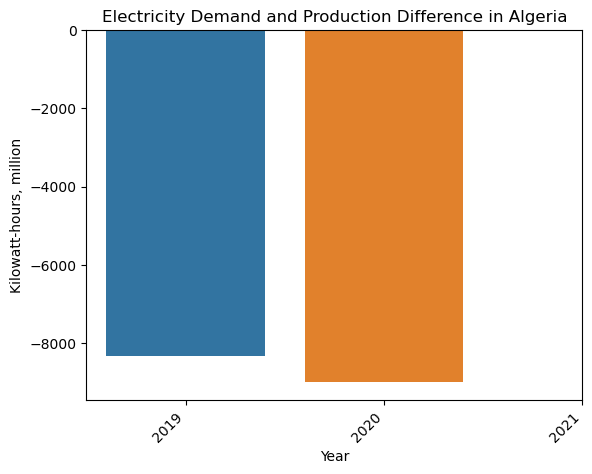

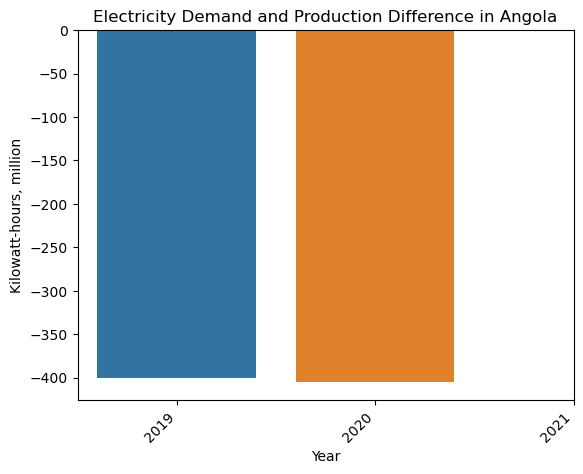

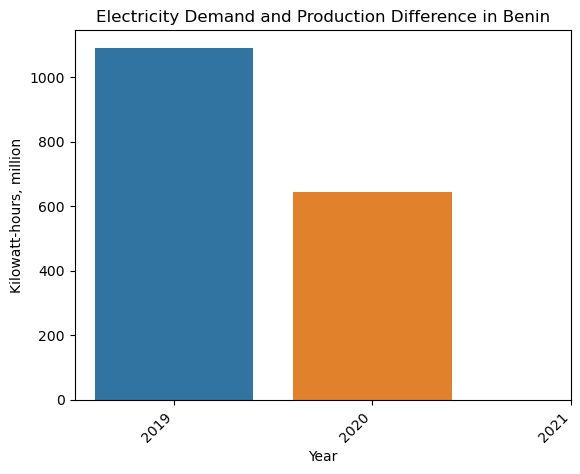

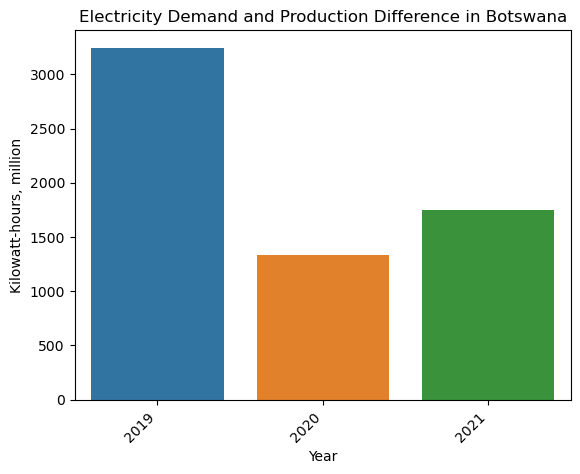

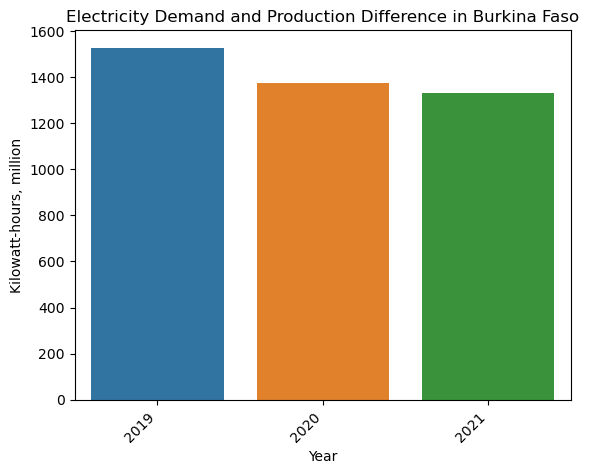

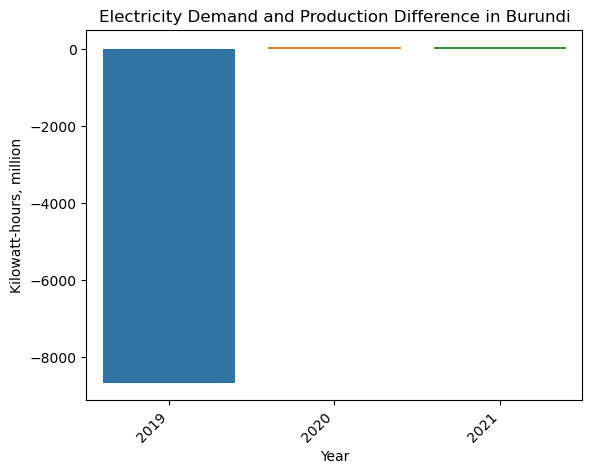

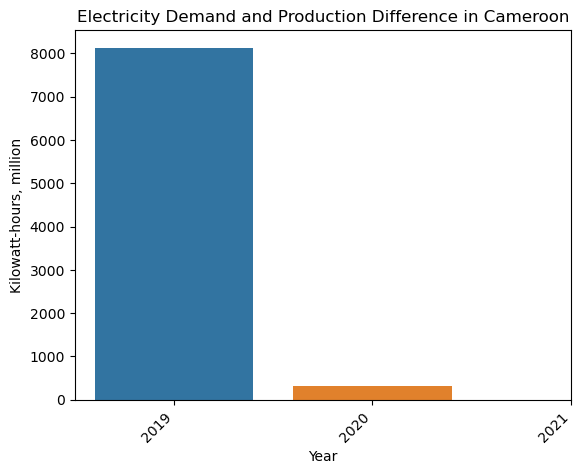

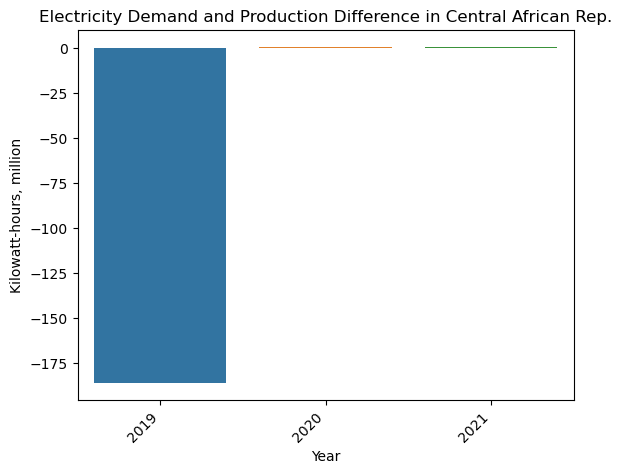

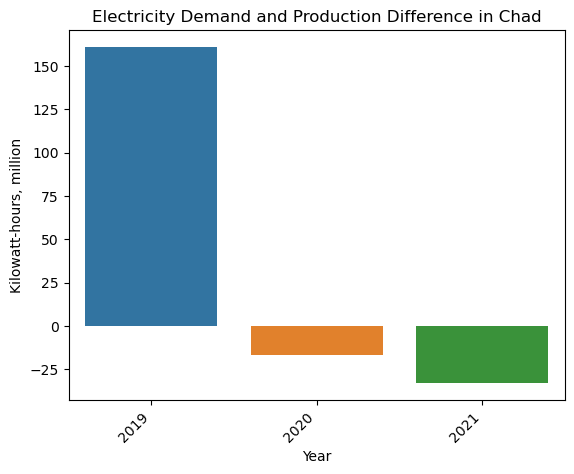

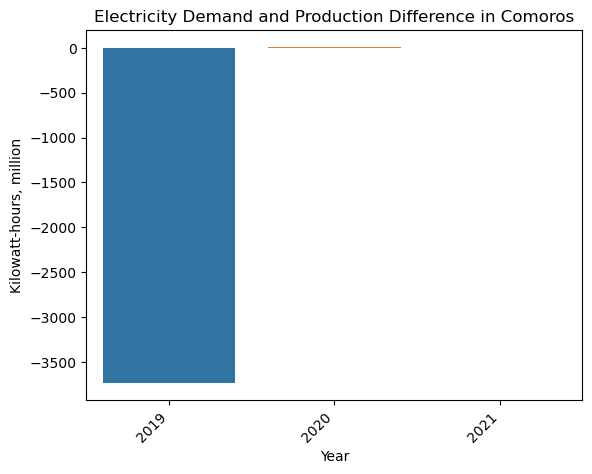

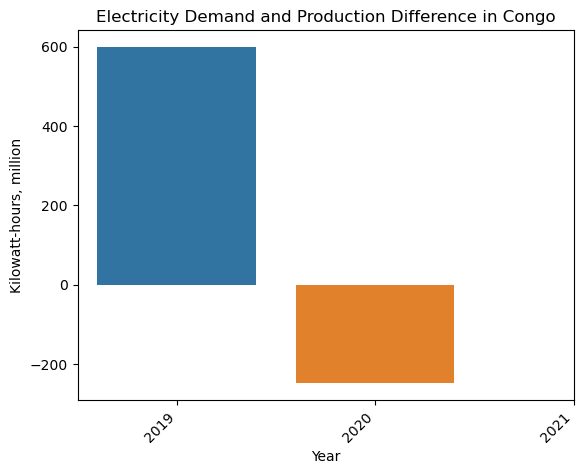

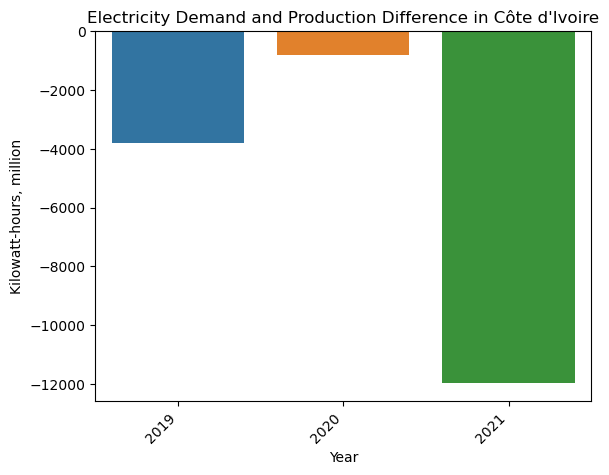

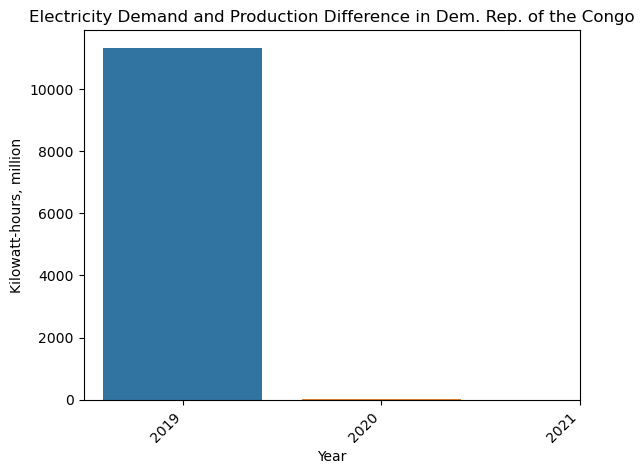

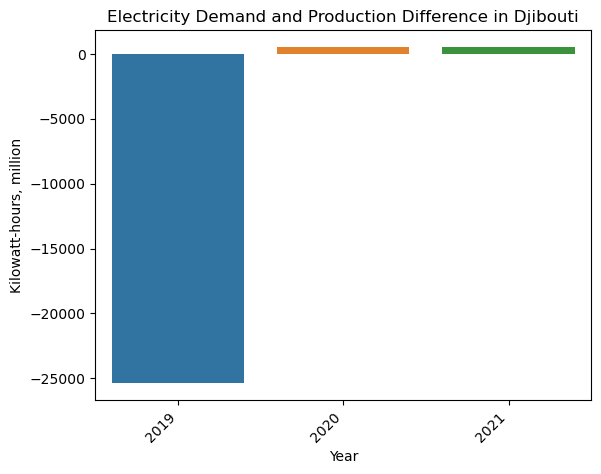

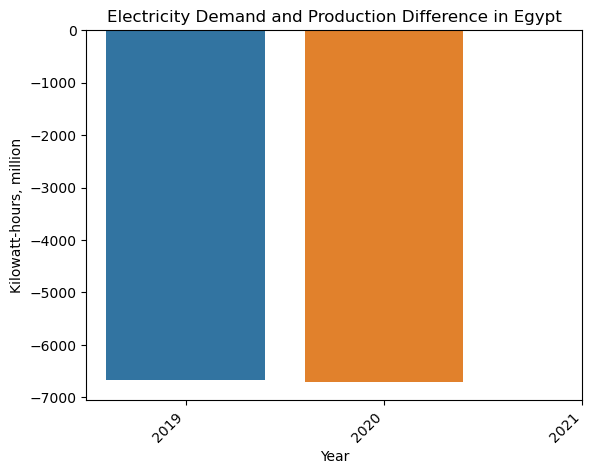

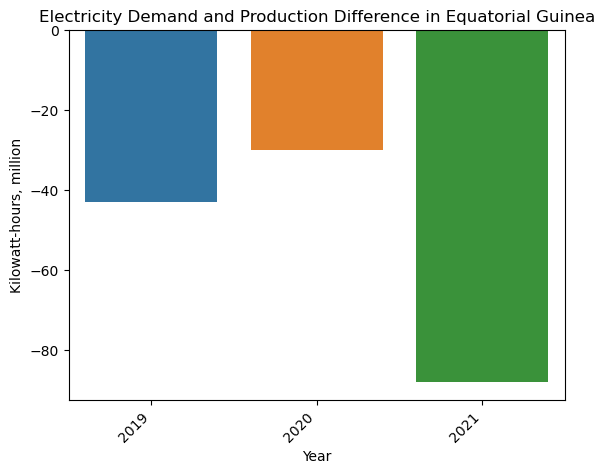

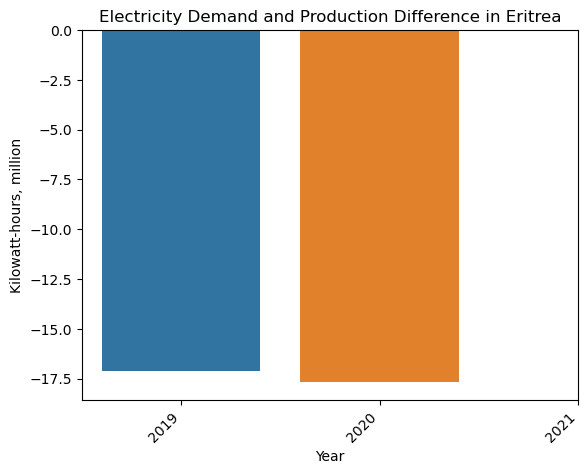

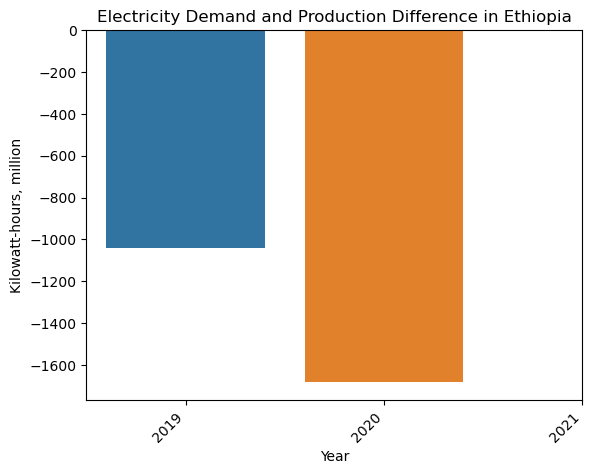

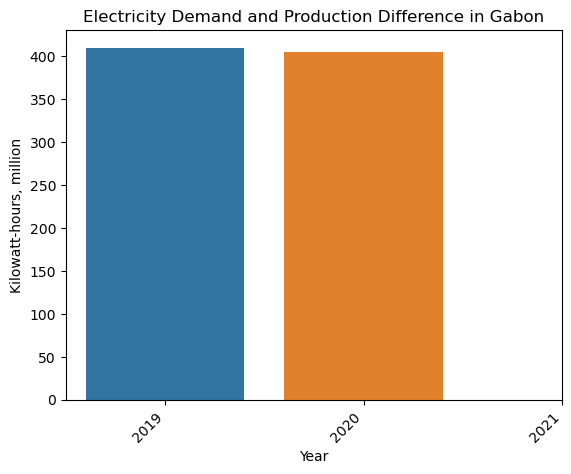

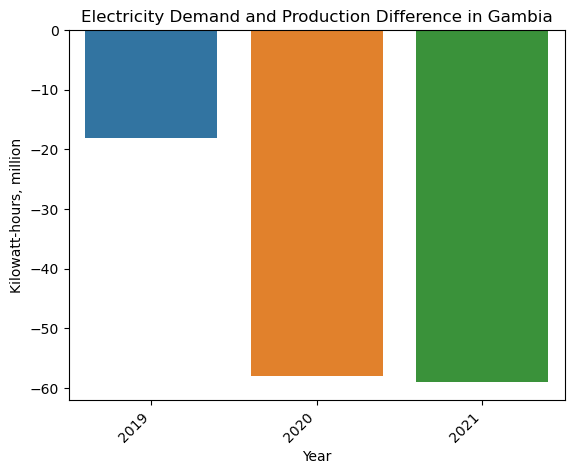

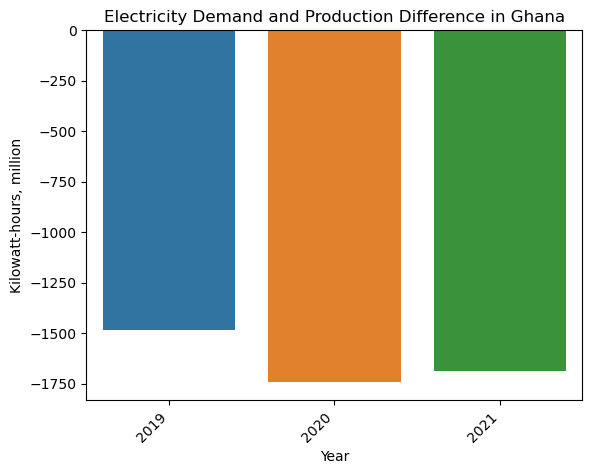

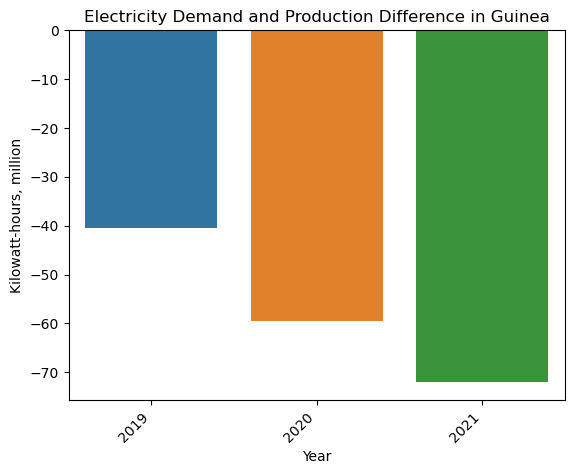

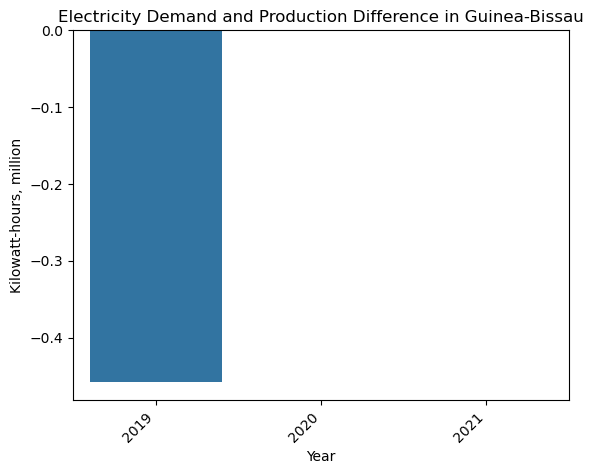

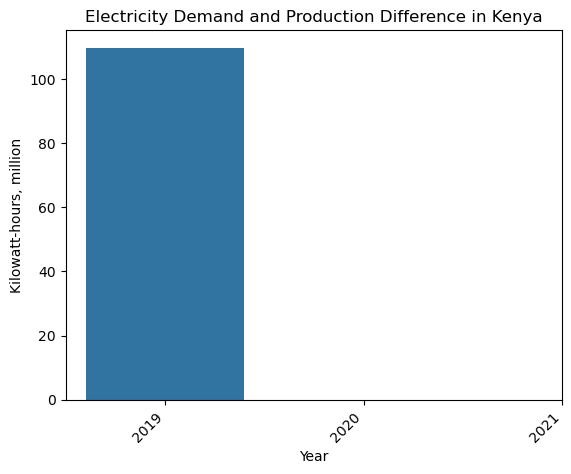

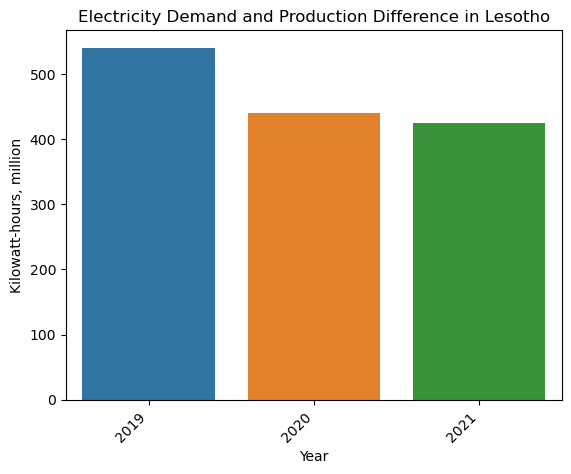

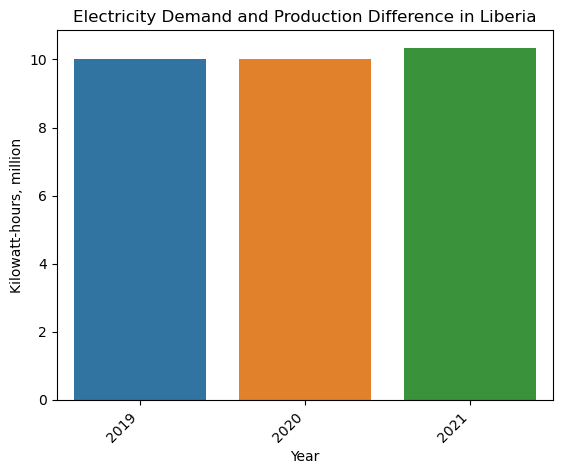

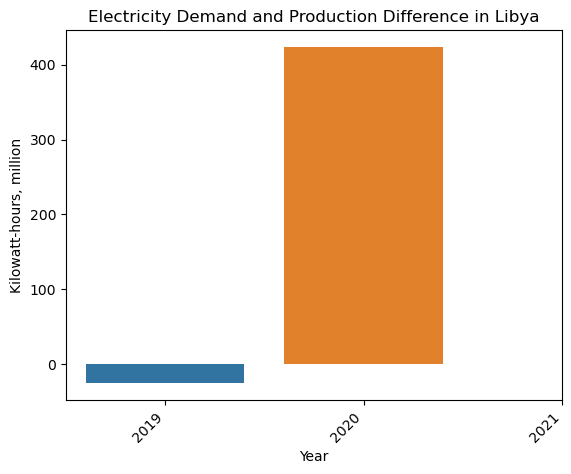

In [473]:
#I wrote a for loop to iterate over each unique country in the plot data.
#This way I could have a plot for each country.
for country in plot_data['Country or Area'].unique():
    #I stored the rows for a specific country as Country Data.
    country_data = plot_data[plot_data['Country or Area'] == country]
    #I plotted the country's data.
    barplot_difference = sns.barplot(data=country_data, x='Year', y='Difference')
    #Here not all the country had complete data for all the years. 
    #So I initialized the number of x ticks to be equal to the number of years
    #of data that I had for each country.
    barplot_difference.set_xticks(range(len(years)))
    #Here I just labeled the x ticks and formatted them.
    barplot_difference.set_xticklabels(years, rotation=45, ha='right')
    #Here I labeled the units of electricity we were working with.
    barplot_difference.set_ylabel('Kilowatt-hours, million')
    #Here I titled each plot with the specific country's name.
    barplot_difference.set_title(f"Electricity Demand and Production Difference in {country}")
    #Here I displayed the plot.
    plt.show()

Insights and Conclusions

If there's anything we can see from the surplus or deficit, is that it is wildly turbulent throughout the continent. There doesn't seem to be any one trend from country to country in regards to how COVID might have affect Production and Demand. It seems that the changes from year to year change in pattern for each country, so it is best to look at each plot individually based on your country of interest. In regards to the heatmaps, it is important to remember that not all countries had data from each year. However, the capacity and infrastructure to report such statistics might be positively correlated with the development of the country, which is notable since I wanted to draw a possible positive correlation that the red zones for Production and Demand in Ghana and Egypt could be due to higher levels of development in the Energy sector. Indicating higher overall prosperity and development in those countries. It might be worth looking into correlations between economic development stats and energy stats. There's much more that can be explored with this data. But that was just an intitial curiousity of mine. COVID doesn't appear to have had a singular type of impact on all of the countries deficit or surplus in Electricity demand and production.